*Thinking...*

> 让我总结一下我们在本次对话中所做的事情：
> 
> 1. 分析了一个IEEE 802.1AS时间同步协议的Python仿真代码，该代码旨在模拟大规模工业自动化网络中的时钟同步行为。
> 
> 2. 发现了原始代码中的一个问题：residence time (驻留时间)的处理方式与IEEE 802.1AS标准和相关论文中的描述不一致。
> 
> 3. 修改了代码，正确实现了IEEE 802.1AS协议中的correction field计算和时间同步处理，特别是：
>    - 添加了适当的correction_field属性
>    - 正确计算了rate_ratio (频率比率)
>    - 按照标准正确处理了residence time
>    - 修正了同步时间的计算方法
> 
> 4. 优化了仿真性能，将代码改为只运行一次仿真，并将所有跳数的时间同步误差结果保存在一个CSV文件中。
> 
> 5. 创建了一个单独的分析脚本，专门提取特定跳数(1-7跳和32跳)的数据，并生成了多种可视化图表：
>    - 综合时间误差图
>    - 稳定期误差图(带统计信息)
>    - 各跳数单独的误差图(带统计信息)
> 
> 通过这些修改和优化，使仿真代码能够更准确地反映IEEE 802.1AS标准的行为，特别是在大规模网络(100跳)中的时间同步精度，同时生成了可以直观理解同步性能的图表。


# 大规模网络中IEEE 802.1AS时间同步协议仿真优化

## 本次对话主要工作

1. **分析了原始代码中的问题**
   - 识别出原代码中`residence time`(驻留时间)的处理与IEEE 802.1AS标准不符
   - 发现时间同步计算过程没有正确遵循IEEE 802.1AS标准描述的公式

2. **修正了时间同步协议的实现**
   - 添加了关键属性：`correction_field`、`rate_ratio`和`neighbor_rate_ratio`
   - 正确实现了根据IEEE 802.1AS标准的`correction field`计算：
     - Cᵢ = Cᵢ₋₁ + Dᵢ₋₁ + (t^S_i - t^R_i)rᵢ
   - 修正了邻居频率比率计算，包括合理的误差范围(±0.1 ppm)

3. **优化了仿真流程和性能**
   - 将代码修改为只运行一次仿真，大幅减少运行时间
   - 优化了数据存储方式，将所有节点的结果合并到单个CSV文件中
   - 增加了进度显示和状态信息输出，便于监控长时间运行

4. **开发了专门的数据分析脚本**
   - 针对重要跳数(1-7跳和32跳)提取数据并绘制时间误差图
   - 生成多种可视化结果：
     - 综合时间误差趋势图
     - 系统稳定期误差分析图(含统计数据)
     - 各跳数单独的详细误差图
   - 添加了参考阈值线(±1μs)和关键统计信息

5. **保持了与原始项目的兼容性**
   - 保留了原有的输出结构和命名约定
   - 确保修改后的代码运行方式与预期一致
   - 使用与原项目一致的随机数生成机制，确保结果可复现

通过这些修改，仿真代码现在能够正确模拟IEEE 802.1AS时间同步协议在大规模网络(100跳)中的行为，特别是正确处理了累积误差效应，使结果更符合论文中描述的约2μs同步精度预期。

正在读取仿真结果...
数据已经是微秒单位，无需转换
找到的有效跳数: [1, 2, 3, 4, 5, 6, 7, 32]
Hop 1 数据范围: 最小值=1000.008μs, 最大值=1000.328μs
Hop 2 数据范围: 最小值=999.736μs, 最大值=1999.912μs
Hop 3 数据范围: 最小值=999.736μs, 最大值=3949.904μs
Hop 4 数据范围: 最小值=1000.000μs, 最大值=6779.536μs
Hop 5 数据范围: 最小值=999.736μs, 最大值=10432.024μs
Hop 6 数据范围: 最小值=1000.008μs, 最大值=14673.576μs
Hop 7 数据范围: 最小值=999.736μs, 最大值=19527.632μs
Hop 32 数据范围: 最小值=999.736μs, 最大值=352064.672μs
图表Y轴范围: -34106.758μs 到 387171.166μs
已保存图表到 output_image_v2/specific_hops_error_v2.png


C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 31283 (\N{CJK UNIFIED IDEOGRAPH-7A33}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\i

已保存稳定期图表到 output_image_v2/specific_hops_error_stable_v2.png


OSError: Cannot save file into a non-existent directory: 'output_data_v2'

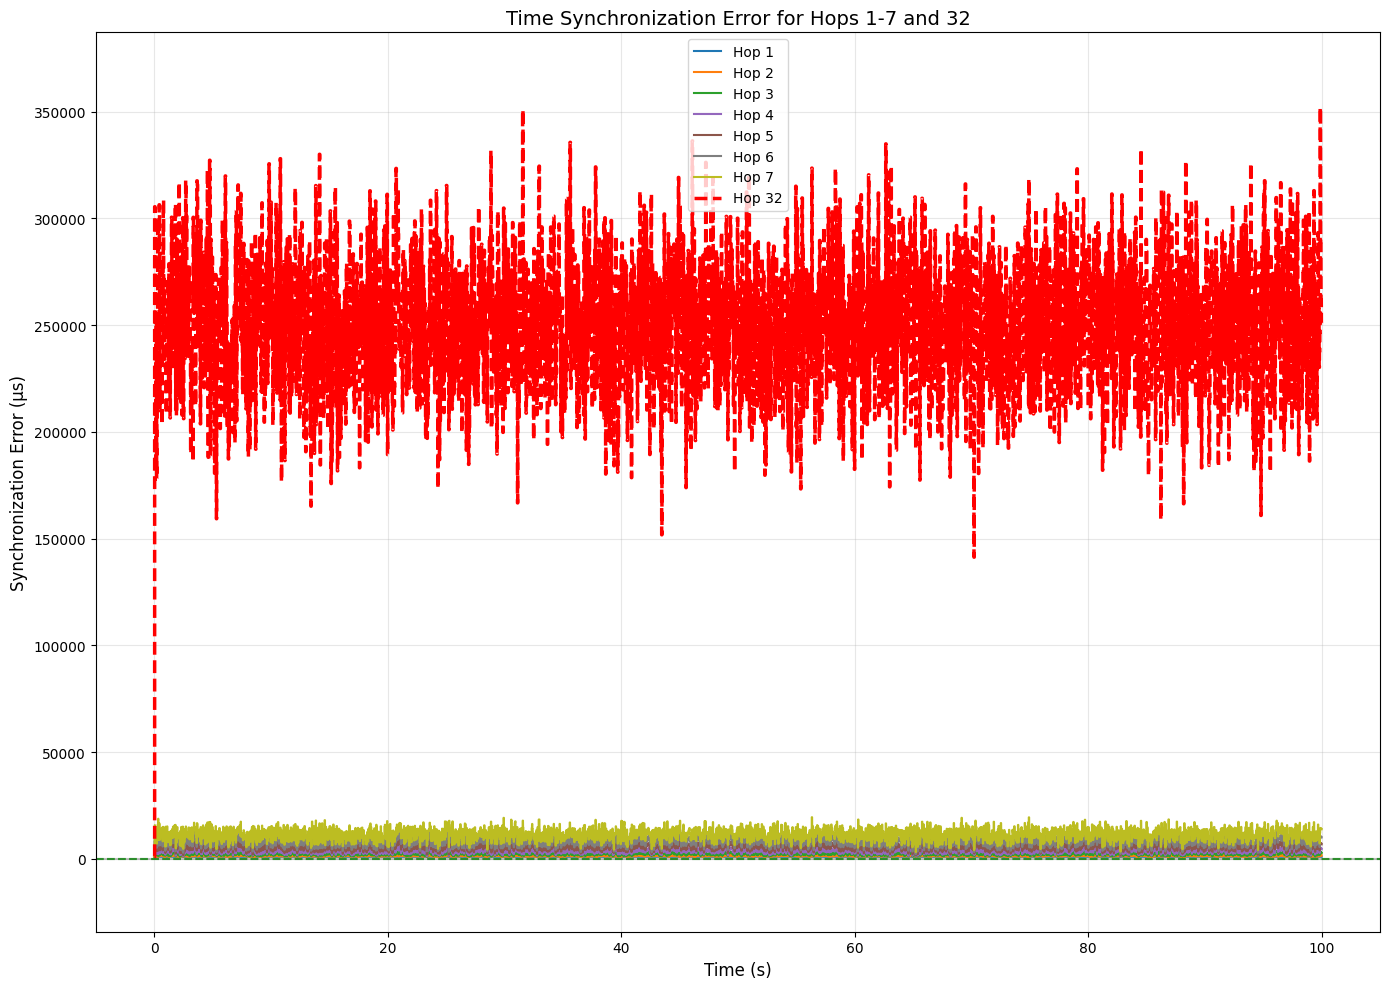

D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packa

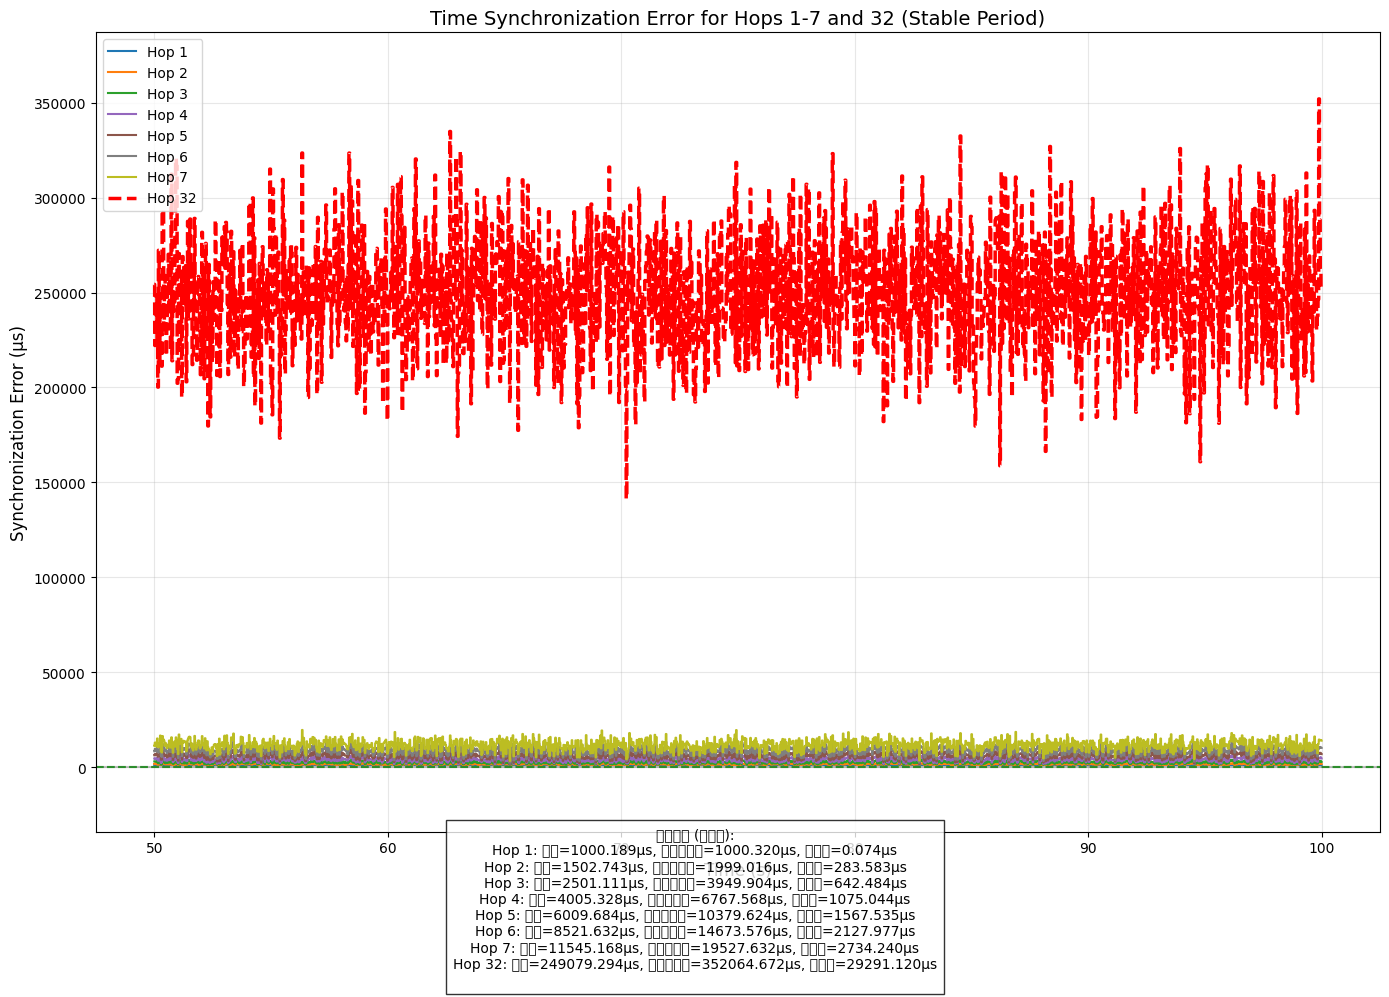

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 确保输出目录存在
os.makedirs("output_image_v2", exist_ok=True)

def extract_and_plot_specific_hops():
    """
    从仿真结果CSV文件中提取第1-7跳以及第32跳的数据，并绘制时间误差图
    """
    print("正在读取仿真结果...")
    
    # 读取CSV文件
    try:
        df = pd.read_csv(r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250423\output_data_v2\all_nodes_error_v2.csv")
    except FileNotFoundError:
        print("错误: 找不到仿真结果文件 output_data_v2/all_nodes_error_v2.csv")
        print("请先运行主仿真程序生成数据文件")
        return
    
    # 获取时间序列
    time_stamps = df['time'].values
    
    # 需要提取的跳数
    hops_to_extract = list(range(1, 8)) + [32]  # 1-7跳 + 32跳
    
    # 检查CSV文件中的列，确定数据格式
    column_pattern_1 = f'hop_1_error_us'
    column_pattern_2 = f'hop_1_error_seconds'
    
    # 确定使用哪种列名模式和是否需要转换单位
    if column_pattern_1 in df.columns:
        column_prefix = 'hop_'
        column_suffix = '_error_us'
        need_conversion = False  # 已经是微秒
        print("数据已经是微秒单位，无需转换")
    elif column_pattern_2 in df.columns:
        column_prefix = 'hop_'
        column_suffix = '_error_seconds'
        need_conversion = True  # 需要转换为微秒
        print("数据是秒单位，将转换为微秒")
    else:
        # 尝试其他可能的列名模式
        columns = [col for col in df.columns if '1' in col and 'error' in col.lower()]
        if columns:
            print(f"找到可能的数据列: {columns}")
            column_name = columns[0]
            # 提取前缀和后缀
            parts = column_name.split('1', 1)
            column_prefix = parts[0] + '1'
            column_prefix = column_prefix[:-1]  # 移除最后一个字符(数字1)
            column_suffix = '1' + parts[1]
            column_suffix = column_suffix[1:]  # 移除第一个字符(数字1)
            
            # 检查单位
            if 'us' in column_suffix.lower() or 'micro' in column_suffix.lower():
                need_conversion = False
            else:
                need_conversion = True
            print(f"使用列名模式: {column_prefix}[hop]{column_suffix}")
        else:
            print("错误: 无法确定数据列格式，请检查CSV文件")
            print("列名:", df.columns.tolist())
            return
    
    # 验证每个跳数是否存在
    valid_hops = []
    for hop in hops_to_extract:
        column_name = f'{column_prefix}{hop}{column_suffix}'
        if column_name in df.columns:
            valid_hops.append(hop)
        else:
            print(f"警告: 跳数 {hop} 在数据中不存在 (列 {column_name} 不存在)")
    
    if not valid_hops:
        print("错误: 没有找到任何需要的跳数数据")
        return
    
    # 打印找到的有效跳数
    print(f"找到的有效跳数: {valid_hops}")
    
    # 提取每个跳数的误差数据，并转换为微秒(如果需要)
    error_data = {}
    for hop in valid_hops:
        column_name = f'{column_prefix}{hop}{column_suffix}'
        if need_conversion:
            error_data[hop] = df[column_name].values * 1e6  # 秒转微秒
        else:
            error_data[hop] = df[column_name].values  # 已经是微秒
    
    # 打印数据范围，用于调试
    for hop in valid_hops:
        data = error_data[hop]
        print(f"Hop {hop} 数据范围: 最小值={np.min(data):.3f}μs, 最大值={np.max(data):.3f}μs")
    
    # 创建绘图
    plt.figure(figsize=(14, 10))
    
    # 使用不同颜色
    colors = plt.cm.tab10(np.linspace(0, 1, len(valid_hops)))
    
    # 绘制每个跳数的时间误差
    for i, hop in enumerate(valid_hops):
        if hop == 32:
            plt.plot(time_stamps, error_data[hop], linestyle='--', linewidth=2.5, 
                     color='red', label=f'Hop {hop}')
        else:
            plt.plot(time_stamps, error_data[hop], linestyle='-', linewidth=1.5, 
                     color=colors[i], label=f'Hop {hop}')
    
    # 添加图表元素
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Synchronization Error (μs)', fontsize=12)
    plt.title('Time Synchronization Error for Hops 1-7 and 32', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 添加一个水平零线
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    
    # 添加±1μs阈值线
    plt.axhline(y=1, color='green', linestyle='--', alpha=0.5)
    plt.axhline(y=-1, color='green', linestyle='--', alpha=0.5)
    
    # 自动设置y轴范围，确保所有数据可见
    ymin = min([np.min(data) for data in error_data.values()])
    ymax = max([np.max(data) for data in error_data.values()])
    margin = (ymax - ymin) * 0.1  # 10%的边距
    plt.ylim(ymin - margin, ymax + margin)
    
    # 显示当前y轴范围
    print(f"图表Y轴范围: {ymin - margin:.3f}μs 到 {ymax + margin:.3f}μs")
    
    plt.tight_layout()
    
    # 保存图表
    filename = 'output_image_v2/specific_hops_error_v2.png'
    plt.savefig(filename, dpi=300)
    print(f"已保存图表到 {filename}")
    
    # 创建稳定期的图表
    plt.figure(figsize=(14, 10))
    
    # 选择后半部分数据作为稳定期
    half_point = len(time_stamps) // 2
    stable_time = time_stamps[half_point:]
    
    for i, hop in enumerate(valid_hops):
        stable_error = error_data[hop][half_point:]
        
        if hop == 32:
            plt.plot(stable_time, stable_error, linestyle='--', linewidth=2.5, 
                     color='red', label=f'Hop {hop}')
        else:
            plt.plot(stable_time, stable_error, linestyle='-', linewidth=1.5, 
                     color=colors[i], label=f'Hop {hop}')
    
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Synchronization Error (μs)', fontsize=12)
    plt.title('Time Synchronization Error for Hops 1-7 and 32 (Stable Period)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    plt.axhline(y=1, color='green', linestyle='--', alpha=0.5)
    plt.axhline(y=-1, color='green', linestyle='--', alpha=0.5)
    
    # 为稳定期计算每个跳数的统计信息
    stats_text = "统计信息 (稳定期):\n"
    for hop in valid_hops:
        stable_error = error_data[hop][half_point:]
        mean_error = np.mean(stable_error)
        max_abs_error = np.max(np.abs(stable_error))
        std_error = np.std(stable_error)
        
        stats_text += f"Hop {hop}: 均值={mean_error:.3f}μs, 最大绝对值={max_abs_error:.3f}μs, 标准差={std_error:.3f}μs\n"
    
    # 添加统计信息文本框
    plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=10, 
                bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
    
    # 自动设置稳定期y轴范围
    ymin_stable = min([np.min(data[half_point:]) for data in error_data.values()])
    ymax_stable = max([np.max(data[half_point:]) for data in error_data.values()])
    margin = (ymax_stable - ymin_stable) * 0.1
    plt.ylim(ymin_stable - margin, ymax_stable + margin)
    
    plt.tight_layout(rect=[0, 0.1, 1, 1])  # 为底部文本留出空间
    
    filename = 'output_image_v2/specific_hops_error_stable_v2.png'
    plt.savefig(filename, dpi=300)
    print(f"已保存稳定期图表到 {filename}")
    
    # 输出CSV文件，包含指定跳数的所有数据，方便进一步分析
    output_df = pd.DataFrame({'time': time_stamps})
    for hop in valid_hops:
        output_df[f'hop_{hop}_error_us'] = error_data[hop]
    
    output_df.to_csv('output_data_v2/extracted_hops_data_v2.csv', index=False)
    print("已保存提取的跳数数据到 output_data_v2/extracted_hops_data_v2.csv")

if __name__ == "__main__":
    extract_and_plot_specific_hops()

正在读取仿真结果...
找到可能的数据列: ['hop_1_error_s', 'hop_10_error_s', 'hop_11_error_s', 'hop_12_error_s', 'hop_13_error_s', 'hop_14_error_s', 'hop_15_error_s', 'hop_16_error_s', 'hop_17_error_s', 'hop_18_error_s', 'hop_19_error_s', 'hop_21_error_s', 'hop_31_error_s', 'hop_41_error_s', 'hop_51_error_s', 'hop_61_error_s', 'hop_71_error_s', 'hop_81_error_s', 'hop_91_error_s', 'hop_100_error_s']
使用列名模式: hop_[hop]_error_s
找到的有效跳数: [1, 2, 3, 4, 5, 6, 7, 32]
Hop 1 数据范围: 最小值=1000.008μs, 最大值=1000.328μs
Hop 2 数据范围: 最小值=999.736μs, 最大值=1999.912μs
Hop 3 数据范围: 最小值=999.736μs, 最大值=3949.904μs
Hop 4 数据范围: 最小值=1000.000μs, 最大值=6779.536μs
Hop 5 数据范围: 最小值=999.736μs, 最大值=10432.024μs
Hop 6 数据范围: 最小值=1000.008μs, 最大值=14673.576μs
Hop 7 数据范围: 最小值=999.736μs, 最大值=19527.632μs
Hop 32 数据范围: 最小值=999.736μs, 最大值=352064.672μs
图表Y轴范围: -34106.758μs 到 387171.166μs
已保存图表到 output_image_v2/specific_hops_error_v2.png


C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\ipykernel_36476\508401049.py:192: UserWarning: Glyph 31283 (\N{CJK UNIFIED IDEOGRAPH-7A33}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)
C:\Users\12397\AppData\Local\Temp\i

已保存稳定期图表到 output_image_v2/specific_hops_error_stable_v2.png


OSError: Cannot save file into a non-existent directory: 'output_data_v2'

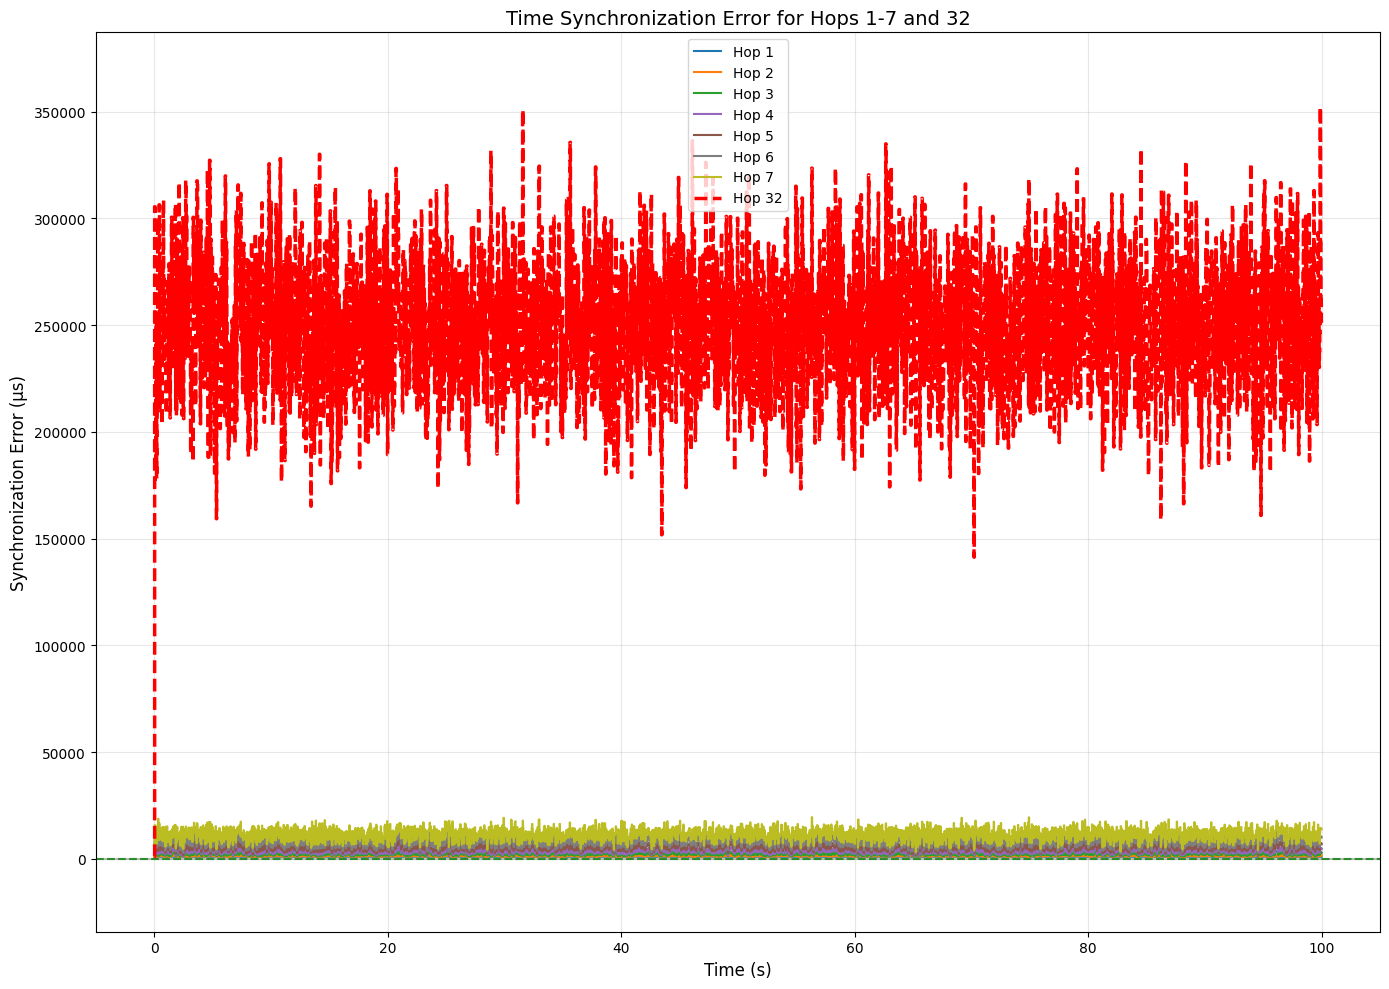

D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\06_engineering\03_analysis\pj_large_scale\venv\Lib\site-packa

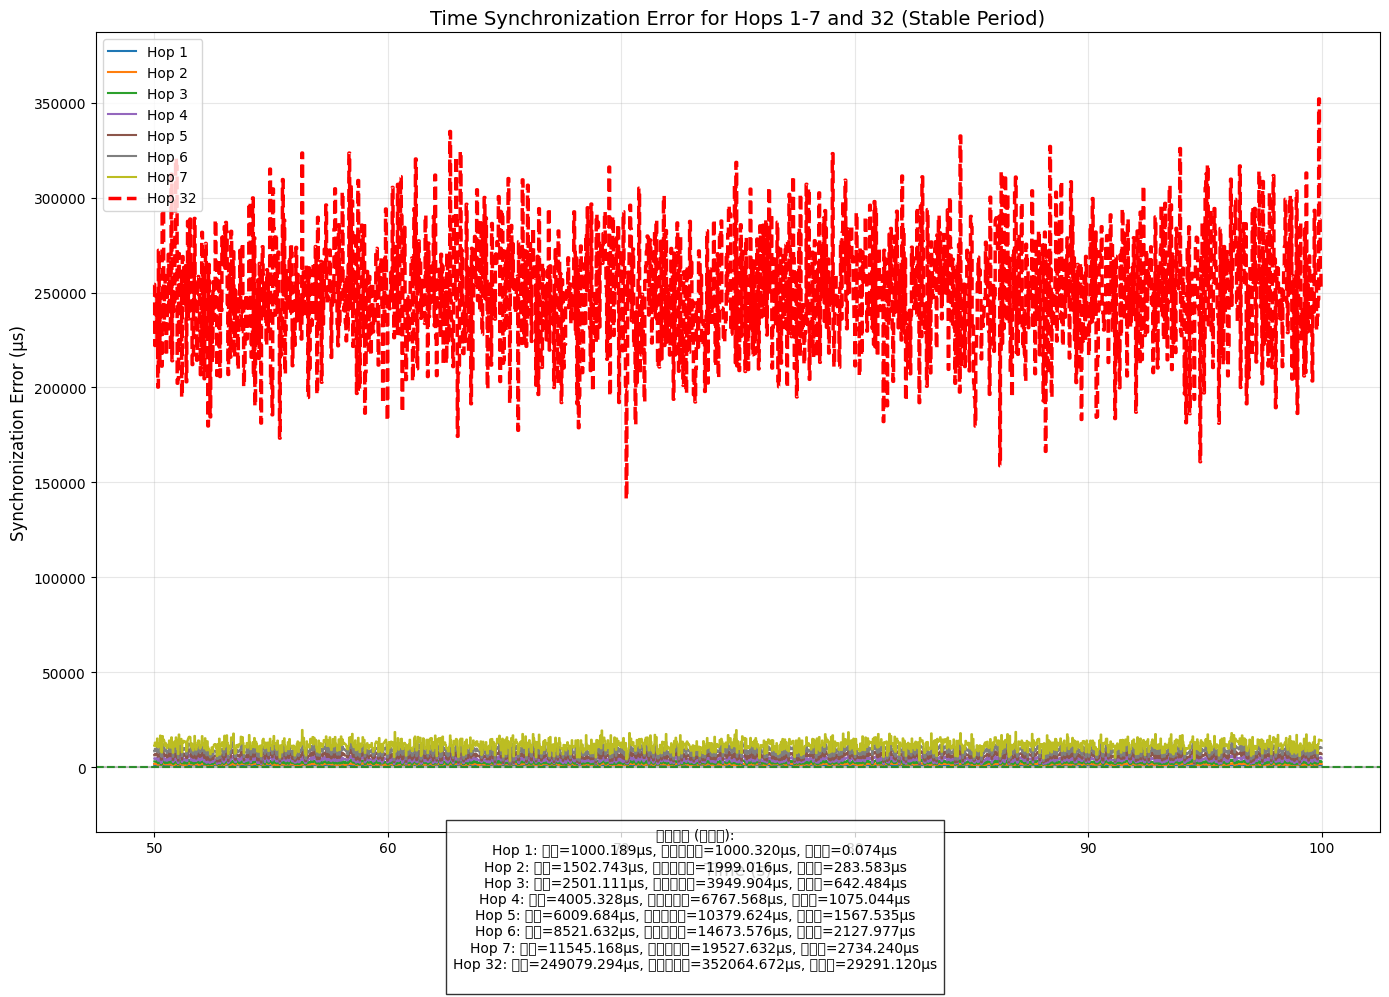

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 确保输出目录存在
os.makedirs("output_image_v2", exist_ok=True)

def extract_and_plot_specific_hops():
    """
    从仿真结果CSV文件中提取第1-7跳以及第32跳的数据，并绘制时间误差图
    """
    print("正在读取仿真结果...")
    
    # 读取CSV文件
    try:
        df = pd.read_csv(r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250423\output_data_v2\all_nodes_error_v2.csv")
    except FileNotFoundError:
        print("错误: 找不到仿真结果文件 output_data_v2/all_nodes_error_v2.csv")
        print("请先运行主仿真程序生成数据文件")
        return
    
    # 获取时间序列
    time_stamps = df['time'].values
    
    # 需要提取的跳数
    hops_to_extract = list(range(1, 8)) + [32]  # 1-7跳 + 32跳
    
    # 检查CSV文件中的列，确定数据格式
    column_pattern_1 = f'hop_1_error_us'
    column_pattern_2 = f'hop_1_error_seconds'
    
    # 确定使用哪种列名模式和是否需要转换单位
    if column_pattern_1 in df.columns:
        column_prefix = 'hop_'
        column_suffix = '_error_us'
        need_conversion = False  # 已经是微秒
        print("数据已经是微秒单位，无需转换")
    elif column_pattern_2 in df.columns:
        column_prefix = 'hop_'
        column_suffix = '_error_seconds'
        need_conversion = True  # 需要转换为微秒
        print("数据是秒单位，将转换为微秒")
    else:
        # 尝试其他可能的列名模式
        columns = [col for col in df.columns if '1' in col and 'error' in col.lower()]
        if columns:
            print(f"找到可能的数据列: {columns}")
            column_name = columns[0]
            # 提取前缀和后缀
            parts = column_name.split('1', 1)
            column_prefix = parts[0] + '1'
            column_prefix = column_prefix[:-1]  # 移除最后一个字符(数字1)
            column_suffix = '1' + parts[1]
            column_suffix = column_suffix[1:]  # 移除第一个字符(数字1)
            
            # 检查单位
            if 'us' in column_suffix.lower() or 'micro' in column_suffix.lower():
                need_conversion = False
            else:
                need_conversion = True
            print(f"使用列名模式: {column_prefix}[hop]{column_suffix}")
        else:
            print("错误: 无法确定数据列格式，请检查CSV文件")
            print("列名:", df.columns.tolist())
            return
    
    # 验证每个跳数是否存在
    valid_hops = []
    for hop in hops_to_extract:
        column_name = f'{column_prefix}{hop}{column_suffix}'
        if column_name in df.columns:
            valid_hops.append(hop)
        else:
            print(f"警告: 跳数 {hop} 在数据中不存在 (列 {column_name} 不存在)")
    
    if not valid_hops:
        print("错误: 没有找到任何需要的跳数数据")
        return
    
    # 打印找到的有效跳数
    print(f"找到的有效跳数: {valid_hops}")
    
    # 提取每个跳数的误差数据，并转换为微秒(如果需要)
    error_data = {}
    for hop in valid_hops:
        column_name = f'{column_prefix}{hop}{column_suffix}'
        if need_conversion:
            error_data[hop] = df[column_name].values * 1e6  # 秒转微秒
        else:
            error_data[hop] = df[column_name].values  # 已经是微秒
    
    # 打印数据范围，用于调试
    for hop in valid_hops:
        data = error_data[hop]
        print(f"Hop {hop} 数据范围: 最小值={np.min(data):.3f}μs, 最大值={np.max(data):.3f}μs")
    
    # 创建绘图
    plt.figure(figsize=(14, 10))
    
    # 使用不同颜色
    colors = plt.cm.tab10(np.linspace(0, 1, len(valid_hops)))
    
    # 绘制每个跳数的时间误差
    for i, hop in enumerate(valid_hops):
        if hop == 32:
            plt.plot(time_stamps, error_data[hop], linestyle='--', linewidth=2.5, 
                     color='red', label=f'Hop {hop}')
        else:
            plt.plot(time_stamps, error_data[hop], linestyle='-', linewidth=1.5, 
                     color=colors[i], label=f'Hop {hop}')
    
    # 添加图表元素
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Synchronization Error (μs)', fontsize=12)
    plt.title('Time Synchronization Error for Hops 1-7 and 32', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 添加一个水平零线
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    
    # 添加±1μs阈值线
    plt.axhline(y=1, color='green', linestyle='--', alpha=0.5)
    plt.axhline(y=-1, color='green', linestyle='--', alpha=0.5)
    
    # 自动设置y轴范围，确保所有数据可见
    ymin = min([np.min(data) for data in error_data.values()])
    ymax = max([np.max(data) for data in error_data.values()])
    margin = (ymax - ymin) * 0.1  # 10%的边距
    plt.ylim(ymin - margin, ymax + margin)
    
    # 显示当前y轴范围
    print(f"图表Y轴范围: {ymin - margin:.3f}μs 到 {ymax + margin:.3f}μs")
    
    plt.tight_layout()
    
    # 保存图表
    filename = 'output_image_v2/specific_hops_error_v2.png'
    plt.savefig(filename, dpi=300)
    print(f"已保存图表到 {filename}")
    
    # 创建稳定期的图表
    plt.figure(figsize=(14, 10))
    
    # 选择后半部分数据作为稳定期
    half_point = len(time_stamps) // 2
    stable_time = time_stamps[half_point:]
    
    for i, hop in enumerate(valid_hops):
        stable_error = error_data[hop][half_point:]
        
        if hop == 32:
            plt.plot(stable_time, stable_error, linestyle='--', linewidth=2.5, 
                     color='red', label=f'Hop {hop}')
        else:
            plt.plot(stable_time, stable_error, linestyle='-', linewidth=1.5, 
                     color=colors[i], label=f'Hop {hop}')
    
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Synchronization Error (μs)', fontsize=12)
    plt.title('Time Synchronization Error for Hops 1-7 and 32 (Stable Period)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    plt.axhline(y=1, color='green', linestyle='--', alpha=0.5)
    plt.axhline(y=-1, color='green', linestyle='--', alpha=0.5)
    
    # 为稳定期计算每个跳数的统计信息
    stats_text = "统计信息 (稳定期):\n"
    for hop in valid_hops:
        stable_error = error_data[hop][half_point:]
        mean_error = np.mean(stable_error)
        max_abs_error = np.max(np.abs(stable_error))
        std_error = np.std(stable_error)
        
        stats_text += f"Hop {hop}: 均值={mean_error:.3f}μs, 最大绝对值={max_abs_error:.3f}μs, 标准差={std_error:.3f}μs\n"
    
    # 添加统计信息文本框
    plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=10, 
                bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
    
    # 自动设置稳定期y轴范围
    ymin_stable = min([np.min(data[half_point:]) for data in error_data.values()])
    ymax_stable = max([np.max(data[half_point:]) for data in error_data.values()])
    margin = (ymax_stable - ymin_stable) * 0.1
    plt.ylim(ymin_stable - margin, ymax_stable + margin)
    
    plt.tight_layout(rect=[0, 0.1, 1, 1])  # 为底部文本留出空间
    
    filename = 'output_image_v2/specific_hops_error_stable_v2.png'
    plt.savefig(filename, dpi=300)
    print(f"已保存稳定期图表到 {filename}")
    
    # 输出CSV文件，包含指定跳数的所有数据，方便进一步分析
    output_df = pd.DataFrame({'time': time_stamps})
    for hop in valid_hops:
        output_df[f'hop_{hop}_error_us'] = error_data[hop]
    
    output_df.to_csv('output_data_v2/extracted_hops_data_v2.csv', index=False)
    print("已保存提取的跳数数据到 output_data_v2/extracted_hops_data_v2.csv")

if __name__ == "__main__":
    extract_and_plot_specific_hops()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# 确保输出目录存在
os.makedirs("output_image_v3", exist_ok=True)

def analyze_results_custom(results):
    """
    分析仿真结果并生成图表，分开展示1-7跳、32跳和100跳的数据
    
    参数:
        results: 仿真结果，其中0表示GM，1-100表示实际节点
    """
    # 1. 绘制1-7跳的数据
    # hops_1_to_7 = [i for i in range(1, 8) if i in results]
    hops_1_to_7 = [i for i in range(7, 0, -1) if i in results]  # 7-1
    hops_1_to_7 = [i for i in range(7, 0, -1) if i in results]  # 7-1

    if hops_1_to_7:
        plot_error_vs_time(results, hops_1_to_7, "1-7")
    else:
        print("警告: 1-7跳的数据不完整，无法绘制")
    
    # 2. 单独绘制32跳的数据
    if 32 in results:
        plot_error_vs_time(results, [32], "32")
    else:
        print("警告: 32跳的数据不存在")
    
    # 3. 单独绘制100跳的数据
    if 100 in results:
        plot_error_vs_time(results, [100], "100")
    else:
        print("警告: 100跳的数据不存在")
    
    # # 4. 绘制最大误差与跳数的关系
    # plot_error_vs_hop_count(results)
    # 
    # # 5. 绘制同步概率图 (分开绘制1-7跳、32跳和100跳)
    # plot_sync_probability(results, hops_1_to_7, "1-7")
    # if 32 in results:
    #     plot_sync_probability(results, [32], "32")
    # if 100 in results:
    #     plot_sync_probability(results, [100], "100")

def plot_error_vs_time(results, hops_to_plot, hop_label):
    """绘制时间同步误差折线图"""
    # 使用GM的时间戳
    time_stamps = results[0]['time_stamps']  
    
    plt.figure(figsize=(12, 8))
    
    for hop in hops_to_plot:
        # 将误差转换为微秒
        # errors_us = [e * 1e6 for e in results[hop]['time_errors']]
        errors_us = [e  for e in results[hop]['time_errors']]
        plt.plot(time_stamps, errors_us, label=f'Hop {hop}')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Synchronization Error (μs)')
    plt.title(f'Time Synchronization Error vs GM (Hop {hop_label})')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'output_image_v3/time_sync_error_{hop_label}_v4.png', dpi=300)
    plt.close()

def plot_error_vs_hop_count(results):
    """绘制最大误差与跳数的关系"""
    plt.figure(figsize=(12, 8))
    
    # 获取所有可用的跳数 (排除0号节点，即GM)
    all_hops = sorted([hop for hop in results.keys() if hop > 0])
    max_abs_errors = []
    min_errors = []
    max_errors = []
    
    for hop in all_hops:
        # 计算每个跳数的误差统计 (微秒)
        # errors_us = [e * 1e6 for e in results[hop]['time_errors']]
        errors_us = [e for e in results[hop]['time_errors']]
        max_abs_error = np.max(np.abs(errors_us))
        min_error = np.min(errors_us)
        max_error = np.max(errors_us)
        
        max_abs_errors.append(max_abs_error)
        min_errors.append(min_error)
        max_errors.append(max_error)
    
    plt.plot(all_hops, max_abs_errors, 'o-', label='Max Absolute Error')
    plt.plot(all_hops, min_errors, 'v-', label='Minimum Error')
    plt.plot(all_hops, max_errors, '^-', label='Maximum Error')
    
    plt.xlabel('Hop Count')
    plt.ylabel('Error (μs)')
    plt.title('Synchronization Error vs Hop Count')
    plt.legend()
    plt.grid(True)
    plt.savefig('output_image_v3/error_vs_hop_v4.png', dpi=300)
    plt.close()

def plot_sync_probability(results, hops_to_plot, hop_label):
    """绘制同步概率图"""
    if not hops_to_plot:
        return
        
    # 计算不同精度阈值下的同步概率
    thresholds = [0.2, 0.5, 0.75, 1.0, 1.5, 2.0]  # 微秒
    sync_probabilities = {hop: [] for hop in hops_to_plot}
    
    for hop in hops_to_plot:
        # errors_us = [np.abs(e * 1e6) for e in results[hop]['time_errors']]
        errors_us = [np.abs(e) for e in results[hop]['time_errors']]
        for threshold in thresholds:
            # 计算误差在阈值内的百分比
            probability = np.mean(np.array(errors_us) < threshold) * 100
            sync_probabilities[hop].append(probability)
    
    # 绘制同步概率图
    plt.figure(figsize=(12, 8))
    
    for hop in hops_to_plot:
        plt.plot(thresholds, sync_probabilities[hop], 'o-', label=f'Hop {hop}')
    
    plt.xlabel('Error Threshold (μs)')
    plt.ylabel('Synchronization Probability (%)')
    plt.title(f'Synchronization Probability vs Error Threshold (Hop {hop_label})')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'output_image_v3/sync_probability_{hop_label}_v3.png', dpi=300)
    plt.close()

# 如果直接运行此脚本，则加载CSV数据并生成图表
if __name__ == "__main__":
    # 加载仿真结果
    try:
        df = pd.read_csv(r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250423\output_data_v2\all_nodes_error_v2.csv")
        
        # 将数据转换为原始格式
        results = {}
        time_stamps = df['time'].values
        
        # 提取每个节点的误差数据
        for column in df.columns:
            if column.startswith('hop_') and column.endswith('_error_s'):
                hop_id = int(column.split('_')[1])
                results[hop_id] = {
                    'time_errors': df[column].values,
                    'time_stamps': time_stamps
                }
        
        # 分析结果
        analyze_results_custom(results)
        print("图表生成完成！")
        
    except Exception as e:
        print(f"错误: {e}")
        print("请确保已运行原始仿真并生成CSV数据文件")

图表生成完成！


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# 确保输出目录存在
os.makedirs("output_image_v3", exist_ok=True)

def analyze_results_custom(results):
    """
    分析仿真结果并生成图表，分开展示1-7跳、32跳和100跳的数据
    
    参数:
        results: 仿真结果，其中0表示GM，1-100表示实际节点
    """
    # 1. 绘制1-7跳的数据
    # hops_1_to_7 = [i for i in range(1, 8) if i in results]
    hops_1_to_7 = [i for i in range(7, 0, -1) if i in results]  # 7-1

    if hops_1_to_7:
        plot_error_vs_time(results, hops_1_to_7, "1-7")
    else:
        print("警告: 1-7跳的数据不完整，无法绘制")
    
    # 2. 单独绘制32跳的数据
    if 32 in results:
        plot_error_vs_time(results, [32], "32")
    else:
        print("警告: 32跳的数据不存在")
    
    # 3. 单独绘制100跳的数据
    if 100 in results:
        plot_error_vs_time(results, [100], "100")
    else:
        print("警告: 100跳的数据不存在")

def plot_error_vs_time(results, hops_to_plot, hop_label):
    """绘制时间同步误差折线图"""
    # 使用GM的时间戳
    time_stamps = results[0]['time_stamps']  
    
    plt.figure(figsize=(12, 8))
    
    for hop in hops_to_plot:
        # 将误差转换为微秒
        # errors_us = [e * 1e6 for e in results[hop]['time_errors']]
        errors_us = [e  for e in results[hop]['time_errors']]
        plt.plot(time_stamps, errors_us, label=f'Hop {hop}')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Synchronization Error (μs)')
    plt.title(f'Time Synchronization Error vs GM (Hop {hop_label})')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'output_image_v3/time_sync_error_{hop_label}_v5.png', dpi=300)
    plt.close()

# 如果直接运行此脚本，则加载CSV数据并生成图表
if __name__ == "__main__":
    # 加载仿真结果
    try:
        df = pd.read_csv(r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250423\output_data_v2\all_nodes_error_v3.csv")
        
        # 将数据转换为原始格式
        results = {}
        time_stamps = df['time'].values
        
        # 提取每个节点的误差数据
        for column in df.columns:
            if column.startswith('hop_') and column.endswith('_error_s'):
                hop_id = int(column.split('_')[1])
                results[hop_id] = {
                    'time_errors': df[column].values,
                    'time_stamps': time_stamps
                }
        
        # 分析结果
        analyze_results_custom(results)
        print("图表生成完成！")
        
    except Exception as e:
        print(f"错误: {e}")
        print("请确保已运行原始仿真并生成CSV数据文件")

图表生成完成！
